# TF Keras Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
sns.set_style('whitegrid')

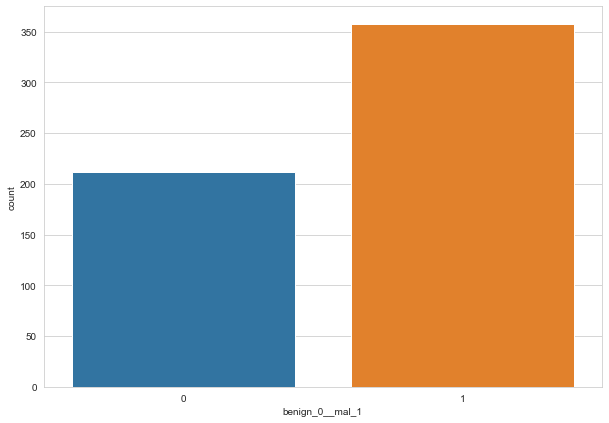

In [8]:
plt.figure(figsize=(10, 7))
sns.countplot(x='benign_0__mal_1', data=df)

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

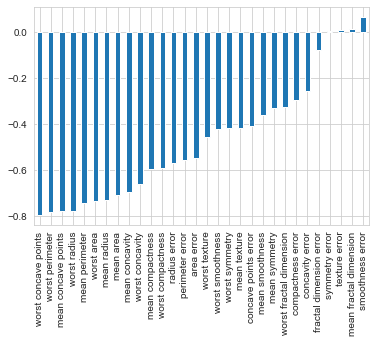

In [11]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

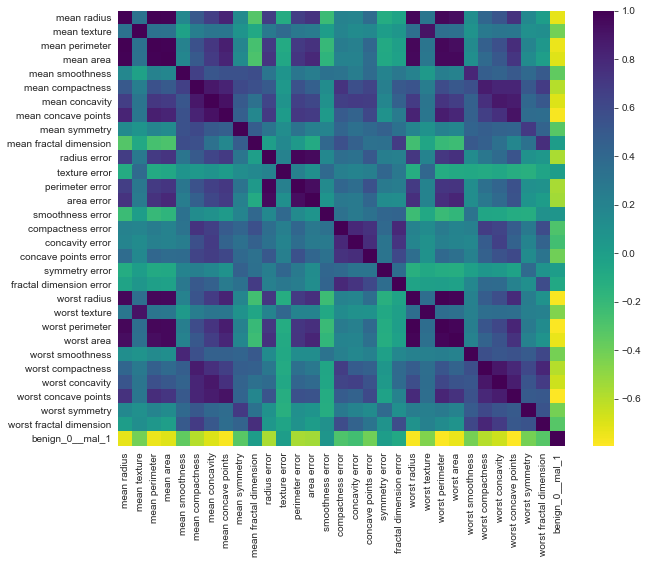

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='viridis_r')

In [17]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Binary Classification => 'sigmoid' activation

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6864 - val_loss: 0.6692
Epoch 2/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6543 - val_loss: 0.6269
Epoch 3/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6191 - val_loss: 0.5885
Epoch 4/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5827 - val_loss: 0.5443
Epoch 5/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5390 - val_loss: 0.4896
Epoch 6/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4937 - val_loss: 0.4436
Epoch 7/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4492 - val_loss: 0.3967
Epoch 8/600
426/426 [==============================] - 0s 89us/sample - loss: 0.4056 - val_loss: 0.3507
Epoch 9/600
426/426 [==============================] - 0s 73us/sample - loss: 0.3641 - val_loss: 0.3100
Epoch 10/600
426/42

In [33]:
loss_df = pd.DataFrame(model.history.history)

In [34]:
loss_df.head()

,loss,val_loss
0,0.686429,0.669186
1,0.654295,0.626906
2,0.619103,0.588536
3,0.582692,0.544293
4,0.539032,0.489596


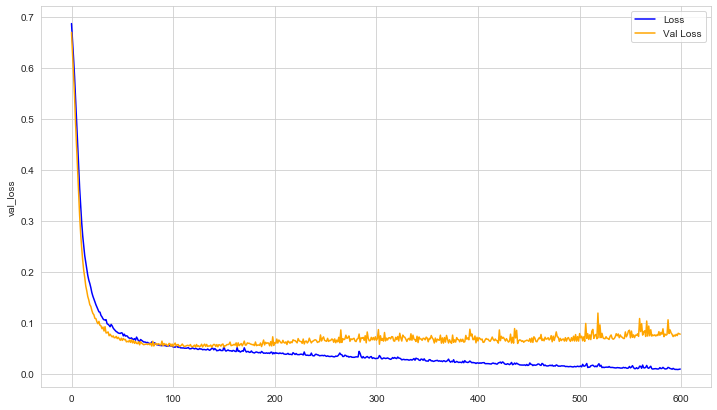

In [35]:
plt.figure(figsize=(12, 7))
sns.lineplot(y=loss_df['loss'], x=loss_df.index, color='blue', label='Loss')
sns.lineplot(y=loss_df['val_loss'], x=loss_df.index, color='orange', label='Val Loss')
plt.legend()

In [36]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Binary Classification => 'sigmoid' activation

model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [39]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 724us/sample - loss: 0.6890 - val_loss: 0.6789
Epoch 2/600
426/426 [==============================] - 0s 46us/sample - loss: 0.6740 - val_loss: 0.6623
Epoch 3/600
426/426 [==============================] - 0s 71us/sample - loss: 0.6525 - val_loss: 0.6313
Epoch 4/600
426/426 [==============================] - 0s 47us/sample - loss: 0.6231 - val_loss: 0.5930
Epoch 5/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5878 - val_loss: 0.5473
Epoch 6/600
426/426 [==============================] - 0s 47us/sample - loss: 0.5436 - val_loss: 0.4937
Epoch 7/600
426/426 [==============================] - 0s 71us/sample - loss: 0.4937 - val_loss: 0.4366
Epoch 8/600
426/426 [==============================] - 0s 47us/sample - loss: 0.4437 - val_loss: 0.3849
Epoch 9/600
426/426 [==============================] - 0s 70us/sample - loss: 0.3963 - val_loss: 0.3342
Epoch 10/600
426/

In [40]:
model_loss = pd.DataFrame(model.history.history)

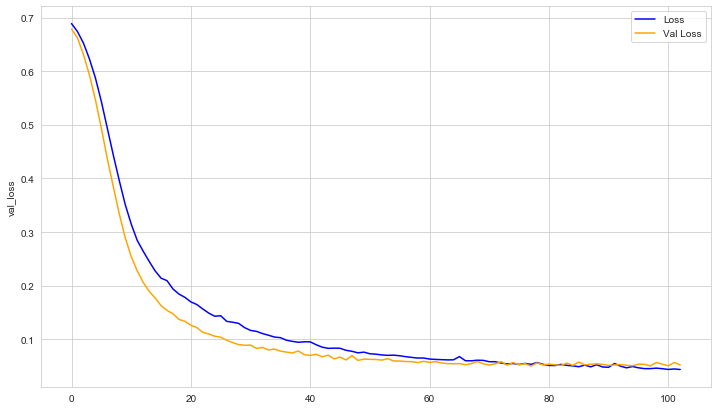

In [42]:
plt.figure(figsize=(12, 7))
sns.lineplot(y=model_loss['loss'], x=model_loss.index, color='blue', label='Loss')
sns.lineplot(y=model_loss['val_loss'], x=model_loss.index, color='orange', label='Val Loss')
plt.legend()

In [44]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Binary Classification => 'sigmoid' activation

model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7094 - val_loss: 0.6808
Epoch 2/600
426/426 [==============================] - 0s 71us/sample - loss: 0.6895 - val_loss: 0.6553
Epoch 3/600
426/426 [==============================] - 0s 47us/sample - loss: 0.6846 - val_loss: 0.6387
Epoch 4/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6672 - val_loss: 0.6207
Epoch 5/600
426/426 [==============================] - 0s 71us/sample - loss: 0.6391 - val_loss: 0.5985
Epoch 6/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6213 - val_loss: 0.5751
Epoch 7/600
426/426 [==============================] - 0s 58us/sample - loss: 0.6065 - val_loss: 0.5462
Epoch 8/600
426/426 [==============================] - 0s 69us/sample - loss: 0.5739 - val_loss: 0.5154
Epoch 9/600
426/426 [==============================] - 0s 48us/sample - loss: 0.5693 - val_loss: 0.4882
Epoch 10/600
426/42

In [46]:
model_loss2 = pd.DataFrame(model.history.history)

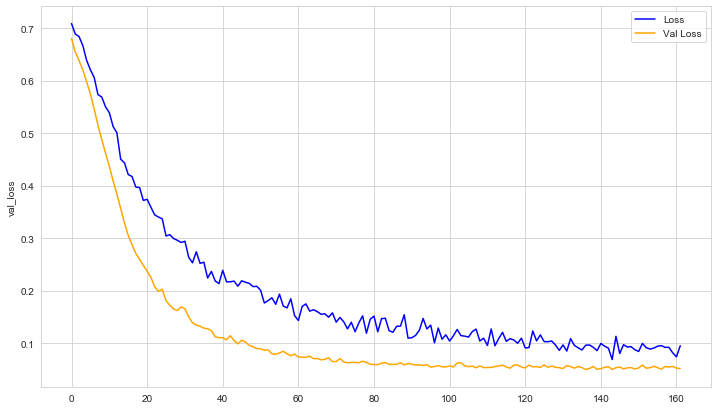

In [47]:
plt.figure(figsize=(12, 7))
sns.lineplot(y=model_loss2['loss'], x=model_loss2.index, color='blue', label='Loss')
sns.lineplot(y=model_loss2['val_loss'], x=model_loss2.index, color='orange', label='Val Loss')
plt.legend()

In [48]:
pred = model.predict_classes(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [52]:
print(confusion_matrix(y_test, pred))

[[53  1]
 [ 2 87]]
